In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pandas import read_csv

In [107]:
loc = "C:/Data/2020/07/20200727/PulsedMeasurement/20200727-0634-29_T2_long_auto_spot81_params_(8e-08, -1, 2830000000.0, 'd_ch4')_pulsed_measurement.dat"
# loc = "C:/Data/2020/07/20200726/PulsedMeasurement/20200726-2319-02_T2_long_auto_spot81_params_(1.2e-07, -3, 2800000000.0, 'd_ch3')_pulsed_measurement.dat"
data = read_csv(loc, skiprows=18, header=None, names=['tau','s1','s2','error1','error2'], delimiter='\t')

In [62]:
data.head()

,tau,s1,s2,error1,error2
0,1.000000e-07,71688.0,65372.0,267.746148,255.679487
1,1.100000e-06,71502.0,65492.0,267.398579,255.914048
2,2.100000e-06,71648.0,65903.0,267.671440,256.715796
3,3.100000e-06,71132.0,66989.0,266.705830,258.822333
4,4.100000e-06,71331.0,66134.0,267.078640,257.165316


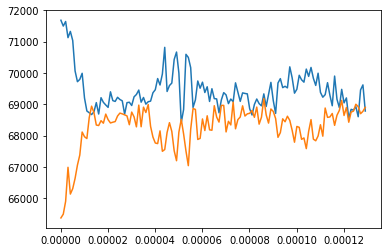

In [63]:
plt.plot(data.tau, data.s1)
plt.plot(data.tau, data.s2)

In [100]:
def exp_plot(tau, A, t2, n):
    return A *np.exp( -(tau/t2)**n )

In [102]:
def stretch_exp_fit(tau, t2, tr, tc, n, A):
    tau_d = tau #- off
    r =A *np.exp( -(tau/t2)**n ) * (np.exp(-((tau_d-0*tr)/tc)**2) + np.exp(-((tau_d-1*tr)/tc)**2) + np.exp(-((tau_d-2*tr)/tc)**2 ) )
    return r

In [108]:
popt,pcov = curve_fit(stretch_exp_fit, data.tau, data.s1-data.s2, p0=[80e-6, 50e-6, 8e-6, 5, 5000], bounds=([0,0,0,1,0], np.inf))

[9.50773427e-05 5.19439452e-05 8.05195246e-06 1.50165913e+00
 5.34944552e+03]
[ 5.75252451  0.50906793  4.20254193 15.60787291  4.70739167]


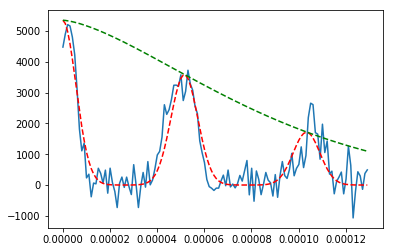

In [109]:
plt.plot(data.tau, data.s1-data.s2)
plt.plot(data.tau, stretch_exp_fit(data.tau, *popt), 'r--' )
plt.plot(data.tau, exp_plot(data.tau, popt[-1], popt[0], popt[-2]), 'g--')
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr/popt*100)